In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
C_v_qm25 = np.load('./Data/C_v_qm25.npy')
C_v_qm50 = np.load('./Data/C_v_qm50.npy')
C_v_qm75 = np.load('./Data/C_v_qm75.npy')
C_v_hyb = np.load('./Data/C_v_hyb.npy')
C = np.load('./Data/c.npy')

He_hyb = np.load('./Data/He_hyb.npy')
Hphe_hyb = np.load('./Data/Hphe_hyb.npy')
Hph_hyb = np.load('./Data/Hph_hyb.npy')

He_qm25 = np.load('./Data/He_qm25.npy')
Hphe_qm25 = np.load('./Data/Hphe_qm25.npy')
Hph_qm25 = np.load('./Data/Hph_qm25.npy')

He_qm35 = np.load('./Data/He_qm35.npy')
Hphe_qm35 = np.load('./Data/Hphe_qm35.npy')
Hph_qm35 = np.load('./Data/Hph_qm35.npy')

E_qm25 = np.load('./Data/E_qm25.npy')
E_qm50 = np.load('./Data/E_qm50.npy')
E_qm75 = np.load('./Data/E_qm75.npy')
E_hyb = np.load('./Data/E_hyb.npy')

Delta_qm25 = np.load('./Data/Delta_qm25.npy')
Delta_qm50 = np.load('./Data/Delta_qm50.npy')
Delta_qm75 = np.load('./Data/Delta_qm75.npy')
Delta_hyb = np.load('./Data/Delta_hyb.npy')


Z = np.load('./Data/Z.npy')

Z_hyb = np.load('./Data/Z_hyb.npy',allow_pickle=True)

In [40]:
sss0 = np.load('./Data/Sp0hy.npy')
sss1 = np.load('./Data/Sp1hy.npy')
sp1 = np.load("./Data/sp1.npy")
sp0 = np.load("./Data/sp0.npy")

In [4]:
params = [(1,.1,1),(1,.3,1),(1,1,2),(1,.5,2)]
T_values = np.concatenate((np.linspace(0.03,1,100),np.linspace(1,5,50)))
beta_values = 1/(T_values)

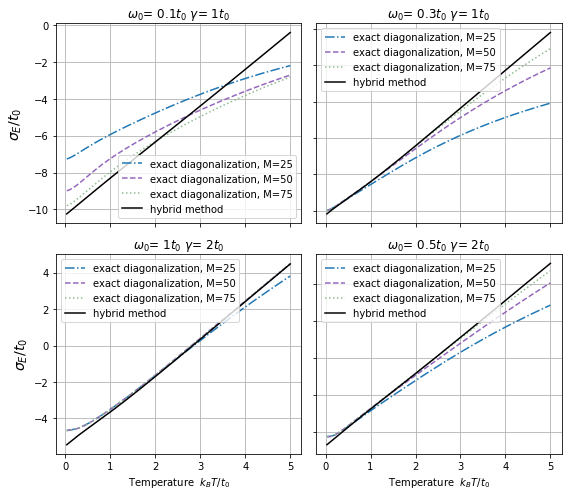

In [5]:
qm = [np.array(E_qm25),np.array(E_qm50),np.array(E_qm75)]
mqm = [25,50,75]
lines = ['dashdot','dashed','dotted'] # 'solid'
hystle = 'solid'
color = ['tab:blue','tab:purple','darkseagreen']
hystle = 'solid'
hcolor = 'black'
hyb = E_hyb  
yaxsis =r'$\sigma_E/t_0$'
fig, axs = plt.subplots(2, 2, figsize=(8,7))
s = 0
j=0


for (x,y) in axs:
    title =r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$ $\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    for n in range(len(qm)):
        x.plot(T_values, qm[n][j], color=color[n], label = 'exact diagonalization, M='+str(mqm[n]),linestyle=lines[n])
    x.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    x.plot(T_values, [a for (a,b,c) in hyb[j]], color =hcolor, label = 'hybrid method',linestyle=hystle)
    
    x.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    x.set_title(title)
    x.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
    title =r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$ $\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    for n in range(len(qm)):
        y.plot(T_values, qm[n][j], color=color[n], label = 'exact diagonalization, M='+str(mqm[n]),linestyle=lines[n])
    y.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    y.plot(T_values, [a for (a,b,c) in hyb[j]], color =hcolor, label = 'hybrid method',linestyle=hystle)
    
    y.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    y.set_title(title)
    y.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
    
for ax in fig.get_axes():
    ax.label_outer()
    ax.grid()
    ax.legend()

fig.tight_layout()
fig.savefig("./Plots/E.pdf")

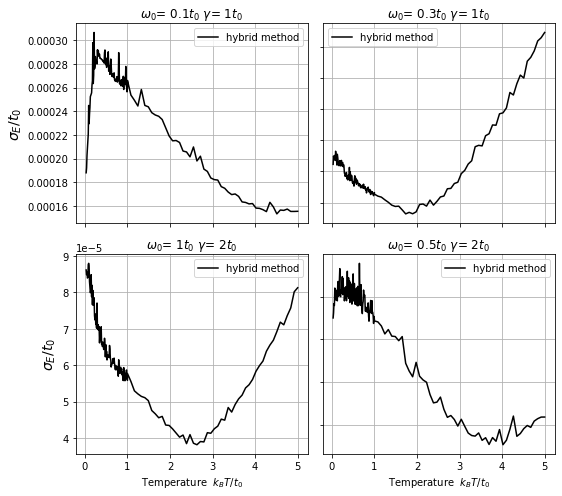

In [6]:
qm = [np.array(E_qm25),np.array(E_qm50),np.array(E_qm75)]
mqm = [25,50,75]
lines = ['dashdot','dashed','dotted'] # 'solid'
hystle = 'solid'
color = ['tab:blue','tab:purple','darkseagreen']
hyb = E_hyb  
yaxsis =r'$\sigma_E/t_0$'
fig, axs = plt.subplots(2, 2, figsize=(8,7))
s = 0
j=0


for (x,y) in axs:
    zj = np.array([a for (a,b) in Z[j]])
    Ej = []
    Eerrj = []
    #z_errj = []
    for (a,b,c) in hyb[j]:
        Ej.append(a)
        Eerrj.append(b)
        #z_errj.append(c)
    Ej = np.array(Ej)
    Eerrj = np.array(Eerrj)
    z_errj = np.array([b for (a,b) in Z[j]])
    #z_errj = np.array(z_errj)
    Errorj = np.sqrt((Eerrj/zj)**2 + (z_errj*Ej/zj)**2)
    title =r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$ $\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    x.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    #x.plot(T_values[s:], E_err(zj,Ej,Eerrj,z_errj)[s:]/Ej[s:], color ='black', label = 'hybrid method',linestyle=hystle)
    x.plot(T_values[s:], Errorj[s:], color ='black', label = 'hybrid method',linestyle=hystle)
    x.set_title(title)
    x.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
    zj = np.array([a for (a,b) in Z[j]])
    z_errj = np.array([b for (a,b) in Z[j]])
    Ej = []
    Eerrj = []
    #z_errj = []
    for (a,b,c) in hyb[j]:
        Ej.append(a)
        Eerrj.append(b)
        #z_errj.append(c)
    Ej = np.array(Ej)
    Eerrj = np.array(Eerrj)
    #z_errj = np.array(z_errj)
    Errorj = np.sqrt((Eerrj/zj)**2 + (z_errj*Ej/zj)**2)
    title =r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$ $\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    
    y.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    #y.plot(T_values[s:], E_err(zj,Ej,Eerrj,z_errj)[s:]/Ej[s:], color ='black', label = 'hybrid method',linestyle=hystle)
    y.plot(T_values[s:], Errorj[s:], color ='black', label = 'hybrid method',linestyle=hystle)
    y.set_title(title)
    y.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
    
for ax in fig.get_axes():
    ax.label_outer()
    ax.grid()
    ax.legend()

fig.tight_layout()
fig.savefig("./Plots/sigmaE.pdf")

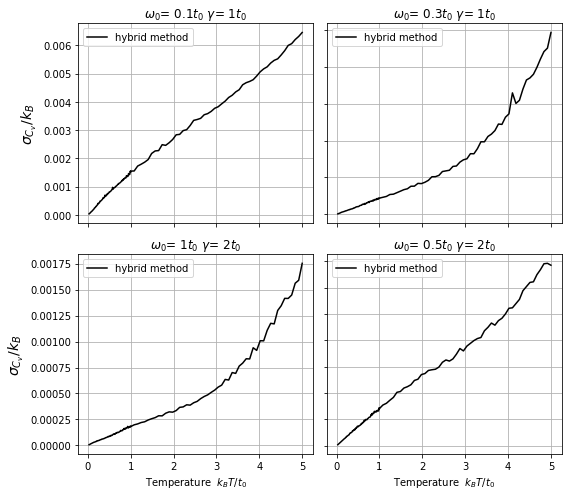

In [7]:
lines = ['dashdot','dashed','dotted'] # 'solid'
hystle = 'solid'
color = ['tab:blue','tab:purple','darkseagreen']
hyb = C  
yaxsis =r'$\sigma_{C_v}/k_B$'
fig, axs = plt.subplots(2, 2, figsize=(8,7))
s = 0

j=0


for (x,y) in axs:
    zj = np.array([a for (a,b) in Z[j]])
    z_errj = np.array([b for (a,b) in Z[j]])
    cv1j = []
    cv2j = []
    cv1errj = []
    cv2errj = []
    for (sdf,cv_1, cv_2, cv_1_err,cv_2_err,z_err) in hyb[j]:
        cv1j.append(cv_1)
        cv2j.append(cv_2)
        cv1errj.append(cv_1_err)
        cv2errj.append(cv_2_err)
    cv1j = np.array(cv1j)
    cv2j = np.array(cv2j)
    cv1errj = np.array(cv1errj)
    cv2errj = np.array(cv2errj)
# a = cv_2, c= cv_1, b= z
    CVerr = np.sqrt((cv2errj*(1/zj)*T_values)**2 +\
                (cv1errj*(2*cv1j/zj**2)*T_values)**2 +\
                (z_errj*(2*(cv1j**2/zj**3)- cv2j/zj**2)*T_values)**2)
    title =r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$ $\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    x.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    #x.plot(T_values[s:], E_err(zj,Ej,Eerrj,z_errj)[s:]/Ej[s:], color ='black', label = 'hybrid method',linestyle=hystle)
    x.plot(T_values[s:], CVerr[s:], color ='black', label = 'hybrid method',linestyle=hystle)
    x.set_title(title)
    x.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
    zj = np.array([a for (a,b) in Z[j]])
    z_errj = np.array([b for (a,b) in Z[j]])
    cv1j = []
    cv2j = []
    cv1errj = []
    cv2errj = []
    for (sdf,cv_1, cv_2, cv_1_err,cv_2_err,z_err) in hyb[j]:
        cv1j.append(cv_1)
        cv2j.append(cv_2)
        cv1errj.append(cv_1_err)
        cv2errj.append(cv_2_err)
    cv1j = np.array(cv1j)
    cv2j = np.array(cv2j)
    cv1errj = np.array(cv1errj)
    cv2errj = np.array(cv2errj)
# a = cv_2, c= cv_1, b= z
    CVerr = np.sqrt((cv2errj*(1/zj)*T_values)**2 +\
                (cv1errj*(2*cv1j/zj**2)*T_values)**2 +\
                (z_errj*(2*(cv1j**2/zj**3)- cv2j/zj**2)*T_values)**2)
    title =r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$ $\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    
    y.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    #y.plot(T_values[s:], E_err(zj,Ej,Eerrj,z_errj)[s:]/Ej[s:], color ='black', label = 'hybrid method',linestyle=hystle)
    y.plot(T_values[s:], CVerr[s:], color ='black', label = 'hybrid method',linestyle=hystle)
    y.set_title(title)
    y.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
    
for ax in fig.get_axes():
    ax.label_outer()
    ax.grid()
    ax.legend()

fig.tight_layout()
fig.savefig("./Plots/sigmaCv.pdf")

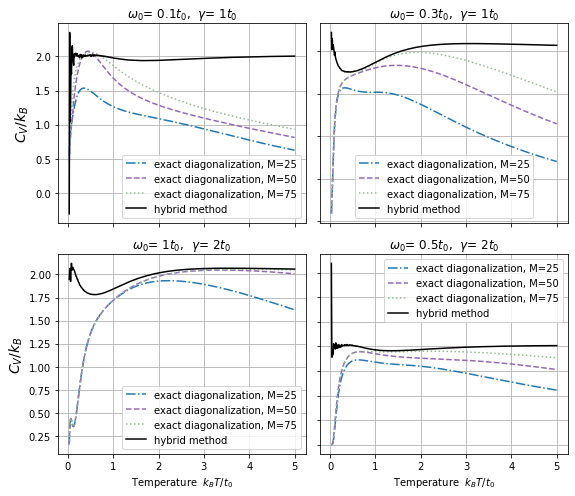

In [8]:
qm = [C_v_qm25,C_v_qm50,C_v_qm75]
mqm = [25,50,75]
hyb = C_v_hyb 
yaxsis =r'$C_V/k_B$'

lines = ['dashdot','dashed','dotted'] # 'solid'
hystle = 'solid'
color = ['tab:blue','tab:purple','darkseagreen']
hcolor = 'black'
 

fig, axs = plt.subplots(2, 2, figsize=(8,7))
j=0
for (x,y) in axs: 
    title = r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$,  '+r'$\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    
    for n in range(len(qm)):
        x.plot(T_values, qm[n][j], color=color[n], label = 'exact diagonalization, M='+str(mqm[n]),linestyle=lines[n])
    x.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    x.plot(T_values, [a for (a,b,c,d) in hyb[j]], color =hcolor, label = 'hybrid method',linestyle=hystle)
    x.set_title(title)
    x.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
    title = r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$,  '+r'$\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    
    for n in range(len(qm)):
        y.plot(T_values, qm[n][j], color=color[n], label = 'exact diagonalization, M='+str(mqm[n]),linestyle=lines[n])
    y.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    y.plot(T_values, [a for (a,b,c,d) in hyb[j]], color =hcolor, label = 'hybrid method',linestyle=hystle)
    y.set_title(title)
    y.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
for ax in fig.get_axes():
    ax.label_outer()
    ax.grid()
    ax.legend()

fig.tight_layout()
fig.savefig("./Plots/cv.pdf")


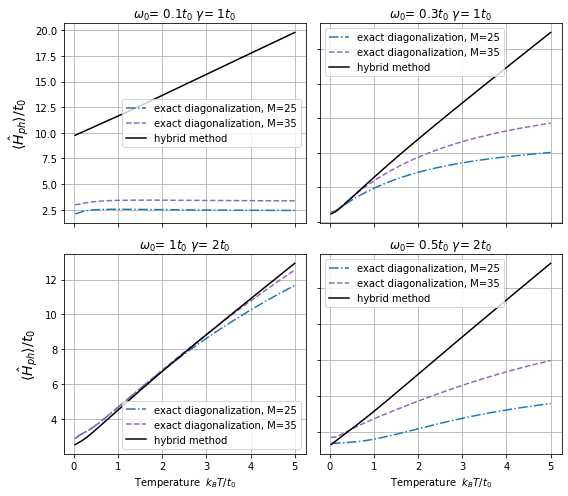

In [9]:
qm = [np.array(Hph_qm25),np.array(Hph_qm35)]
mqm = [25,35]
lines = ['dashdot','dashed','dotted'] # 'solid'
hystle = 'solid'
color = ['tab:blue','tab:purple','darkseagreen']
hyb = Hph_hyb  
yaxsis =r'$\langle \hat{H}_{ph}\rangle/t_0$'
fig, axs = plt.subplots(2, 2, figsize=(8,7))
j=0
for (x,y) in axs:
    title =r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$ $\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    
    for n in range(len(qm)):
        x.plot(T_values, qm[n][j], color=color[n], label = 'exact diagonalization, M='+str(mqm[n]),linestyle=lines[n])
    x.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    x.plot(T_values, np.array([a for (a,b,c) in hyb[j]]), color ='black', label = 'hybrid method',linestyle=hystle)
    x.set_title(title)
    x.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
    title =r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$ $\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    
    for n in range(len(qm)):
        y.plot(T_values, qm[n][j], color=color[n], label = 'exact diagonalization, M='+str(mqm[n]),linestyle=lines[n])
    y.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    y.plot(T_values, np.array([a for (a,b,c) in hyb[j]]), color ='black', label = 'hybrid method',linestyle=hystle)
    y.set_title(title)
    y.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
for ax in fig.get_axes():
    ax.label_outer()
    ax.grid()
    ax.legend()

fig.tight_layout()
fig.savefig("./Plots/Hph.pdf")

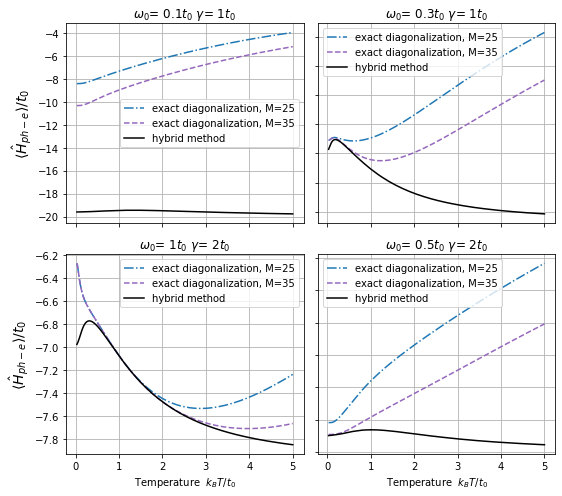

In [10]:
qm = [np.array(Hphe_qm25),np.array(Hphe_qm35)]
mqm = [25,35]
lines = ['dashdot','dashed','dotted'] # 'solid'
hystle = 'solid'
color = ['tab:blue','tab:purple','darkseagreen']
hyb = Hphe_hyb  
yaxsis =r'$\langle \hat{H}_{ph-e}\rangle/t_0$'
fig, axs = plt.subplots(2, 2, figsize=(8,7))
j=0
for (x,y) in axs:
    title =r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$ $\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    
    for n in range(len(qm)):
        x.plot(T_values, qm[n][j], color=color[n], label = 'exact diagonalization, M='+str(mqm[n]),linestyle=lines[n])
    x.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    x.plot(T_values, np.array([a for (a,b,c) in hyb[j]]), color ='black', label = 'hybrid method',linestyle=hystle)
    x.set_title(title)
    x.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
    title =r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$ $\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    
    for n in range(len(qm)):
        y.plot(T_values, qm[n][j], color=color[n], label = 'exact diagonalization, M='+str(mqm[n]),linestyle=lines[n])
    y.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    y.plot(T_values, np.array([a for (a,b,c) in hyb[j]]), color ='black', label = 'hybrid method',linestyle=hystle)
    y.set_title(title)
    y.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
for ax in fig.get_axes():
    ax.label_outer()
    ax.grid()
    ax.legend()

fig.tight_layout()
fig.savefig("./Plots/Hphe.pdf")

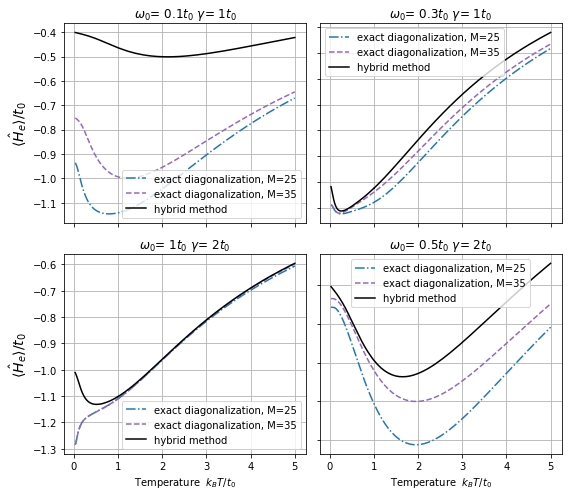

In [11]:
qm = [np.array(He_qm25),np.array(He_qm35)]
mqm = [25,35]
lines = ['dashdot','dashed','dotted'] # 'solid'
hystle = 'solid'
color = ['tab:blue','tab:purple','darkseagreen']
hyb = He_hyb  
yaxsis =r'$\langle \hat{H}_e\rangle/t_0$'
fig, axs = plt.subplots(2, 2, figsize=(8,7))
j=0
for (x,y) in axs:
    title =r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$ $\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    
    for n in range(len(qm)):
        x.plot(T_values, qm[n][j], color=color[n], label = 'exact diagonalization, M='+str(mqm[n]),linestyle=lines[n])
    x.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    x.plot(T_values, np.array([a for (a,b,c) in hyb[j]]), color ='black', label = 'hybrid method',linestyle=hystle)
    x.set_title(title)
    x.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
    title =r'$\omega_0$='+' '+ str(params[j][1])+r'$t_0$ $\gamma$='+' '+ str(params[j][2])+r'$t_0$'
    
    for n in range(len(qm)):
        y.plot(T_values, qm[n][j], color=color[n], label = 'exact diagonalization, M='+str(mqm[n]),linestyle=lines[n])
    y.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    y.plot(T_values, np.array([a for (a,b,c) in hyb[j]]), color ='black', label = 'hybrid method',linestyle=hystle)
    y.set_title(title)
    y.set_xlabel(xlabel="Temperature"+'  '+ r'$k_BT/t_0$')
    j+=1
for ax in fig.get_axes():
    ax.label_outer()
    ax.grid()
    ax.legend()

fig.tight_layout()
fig.savefig("./Plots/He.pdf")

In [12]:
T = [0.1,.3,0.5,1]
t_0, gamma = 1,1
omega = np.linspace(0.1,2,200)

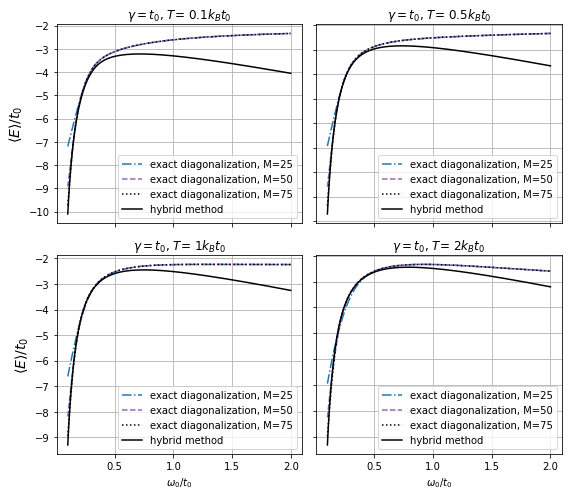

In [35]:
qm = [Delta_qm25,Delta_qm50,Delta_qm75]
mqm = [25,50,75]
hyb = Delta_hyb  
x_ax = omega
yaxsis =r'$\langle E \rangle/t_0$'

lines = ['dashdot','dashed','dotted'] # 'solid'
hystle = 'solid'
color = ['tab:blue','tab:purple','black','darkseagreen']
hcolor = 'black'

fig, axs = plt.subplots(2, 2, figsize=(8,7))
j=0
for (x,y) in axs:
    title = r'$\gamma=t_0$, $T$='+' '+ str(T[j])+r'$k_Bt_0$'
    
    for n in range(len(qm)):
        x.plot(x_ax, qm[n][j], color=color[n], label = 'exact diagonalization, M='+str(mqm[n]),linestyle=lines[n])
    x.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    x.plot(x_ax, [a for (a,b,c) in hyb[j]], color =hcolor, label = 'hybrid method',linestyle=hystle)
    x.set_title(title)
    x.set_xlabel(xlabel=r'$\omega_0/t_0$')
    j+=1
    title = r'$\gamma=t_0$, $T$='+' '+ str(T[j])+r'$k_Bt_0$'
    
    for n in range(len(qm)):
        y.plot(x_ax, qm[n][j], color=color[n], label = 'exact diagonalization, M='+str(mqm[n]),linestyle=lines[n])
    y.set_ylabel(ylabel=yaxsis, fontsize = 14.)
    y.plot(x_ax, [a for (a,b,c) in hyb[j]], color =hcolor, label = 'hybrid method',linestyle=hystle)
    y.set_title(title)
    y.set_xlabel(xlabel=r'$\omega_0/t_0$')
    j+=1
for ax in fig.get_axes():
    ax.label_outer()
    ax.grid()
    ax.legend()

fig.tight_layout()
plt.savefig("./Plots/Eomega.pdf")

In [14]:
params = [(1,.1,1),(1,.3,1),(1,1,2),(1,.5,2)]
eta = 0.1
T = [0.1,.5,1,2]
w = np.linspace(-10,10,100)

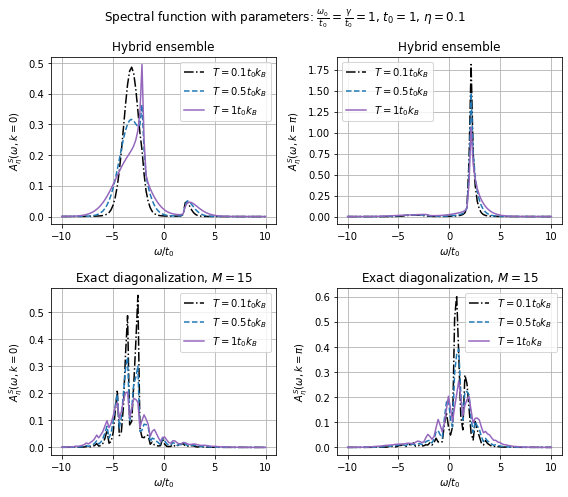

In [41]:
lines = ['dashdot','dashed','solid','dotted'] # 'solid'
hystle = 'solid'
color = ['black','tab:blue','tab:purple','darkseagreen','tab:red']
fig, axs = plt.subplots(2, 2, figsize=(8,7),sharex=False, sharey=False)
fig.suptitle("Spectral function with parameters: "r'$\frac{\omega_0}{t_0}=\frac{\gamma}{t_0}=1$, $t_0=1$, $\eta=0.1$', fontsize = 12.)
for n in range(3): 
    axs[0,0].plot(w,np.array(sss0[n])/2/np.pi,color=color[n],label =r'$T=$'+str(T[n])+r'$t_0k_B$',linestyle=lines[n])
    axs[0,1].plot(w,np.array(sss1[n])/2/np.pi,color=color[n],label =r'$T=$'+str(T[n])+r'$t_0k_B$',linestyle=lines[n])
    axs[1,0].plot(w,np.array(sp0[n])/2/np.pi,color=color[n],label =r'$T=$'+str(T[n])+r'$t_0k_B$',linestyle=lines[n])
    axs[1,1].plot(w,np.array(sp1[n])/2/np.pi,color=color[n],label =r'$T=$'+str(T[n])+r'$t_0k_B$',linestyle=lines[n])
axs[0,0].set_title("Hybrid ensemble")
axs[0,1].set_title("Hybrid ensemble")
axs[1,0].set_title("Exact diagonalization, "+ r'$M=15$')
axs[1,1].set_title("Exact diagonalization, "+ r'$M=15$')

axs[0,0].set_ylabel(ylabel=r'$A_\eta^S(\omega,k=0)$')
axs[0,1].set_ylabel(ylabel=r'$A_\eta^S(\omega,k=\pi)$')
axs[1,0].set_ylabel(ylabel=r'$A_\eta^S(\omega,k=0)$')
axs[1,1].set_ylabel(ylabel=r'$A_\eta^S(\omega,k=\pi)$')

for (x,y) in axs:
    x.set_xlabel(xlabel=r'$\omega/t_0$')
    y.set_xlabel(xlabel=r'$\omega/t_0$')
for ax in fig.get_axes():
    #ax.label_outer()
    ax.grid()
    ax.legend()
fig.tight_layout()
plt.savefig("./Plots/spectral.pdf")

In [21]:
T_valuess = np.concatenate((np.linspace(0.03,1,30),np.linspace(1,5,30)))
beta_valuess = 1/(T_values)

In [32]:
def Z_label(Z_hyb,i):
    l = Z_hyb[i][1]
    if l=='sci':
        return 'Scipy Quad'
    if l=='simpson':
        return 'Simpson'
    if l=='monte_carlo':
        return 'Monte Carlo $n=$'+str(Z_hyb[i][2])
    return l

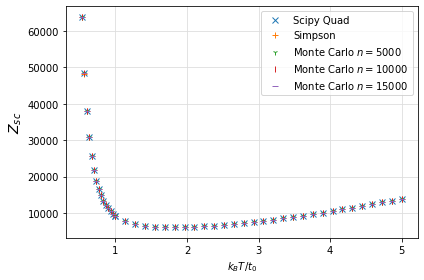

In [37]:
start = 15
major_ticks = np.arange(0, 5, 20)
minor_ticks = np.arange(0, 5, 5)
markers = ["x","+","1","|","_"]

for i in range(len(Z_hyb)):
    plt.plot(T_valuess[start:],[x for (x,y) in Z_hyb[i][0][start:]],markers[i], label = Z_label(Z_hyb,i))

plt.xlabel(xlabel='$k_BT/t_0$')
plt.ylabel(ylabel=r'$Z_{sc}$', fontsize = 14.)
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)

plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("./Plots/Z.pdf")